# $$Trabajo\ Práctico\ Nº1$$

$$ANÁLISIS\ NUMÉRICO$$

$$2do\  Cuatrimestre\ 2018$$

$$ $$

$$Gupo\ S2:$$

$$Batallan,\ David\ Leonardo$$

$$Urquiza,\ Elías\ Santos$$

$$Galante,\ Julieta\ Cloé$$

$$Torres,\ Delfina$$

##  $0.\ Introducción$

_En el presente informe se pretende calcular la raíz de la función_

$$G(z) = \frac{\lambda\ R\ z}{(2\ \epsilon_{0})\ (z^2 + R^2)^{\frac{3}{2}}} -5000$$ 

_de modo tal que la función_

$$E(z) = \frac{\lambda\ R\ z}{(2\ \epsilon_{0})\ (z^2 + R^2)^{\frac{3}{2}}} = 5000 \frac{N}{C}.$$ 

_Constantes utilizadas:_

$$\lambda = 0,1 \mu C$$

$$R = 20 cm$$

$$\epsilon_{0} = 8,85x10^{-12}$$

_Esto lo haremos utilizando métodos numéricos, implementados en Python 3.6, cuyo código será presentado junto con el informe._

_A continuación, inicializamos los valores con los que trabajaremos, al igual que presentaremos un gráfico de la función, y después procederemos a explicar los métodos utiizados._

 

_Para implementar estos métodos, escribimos un código fuente en Python 3.6 que presentaremos a continuación, intercalado con el informe._ 

In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

#Se declara z como variable simbólica
z = sm.symbols('z')

#Se declara la función simbólica
cadena = '1130 * z/((z ** 2 +0.2 ** 2 )^ (3/2)) -5000'
funcion=sm.sympify(cadena)
#Se declara la función derivada simbólica

derivada = sm.diff(funcion,z)


#Se declara la función numérica
G = sm.lambdify(z, funcion)
#Se declara la función derivada

Gp= sm.lambdify(z, derivada)

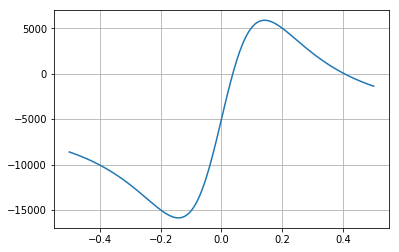

In [2]:
#Se grafica la función a partir de la función numérica
x = np.linspace(-0.5,0.5,101)
plt.plot(x,G(x))
plt.grid()
plt.show()

## $1.\ Resolución\ a\ través\ de\ dos\ métodos\ numéricos$

_Fueron elegidos el método de la Bisección como método de arranque y el de Newton-Raphson como método de refinamiento, ya que, por un lado, son aplicables a la función elegida porque ésta cumple con las condiciones que cada método requiere; tiene multiplicidad impar y es continua en el intervalo elegido, lo cual satisface al primero, y también lo es su derivada, lo cual satisface parte del segundo._}

_Sea [a;b] un intervalo en el que se encuentra una única raiz, podemos definir ambos métodos brevemente._

**_Método de la Bisección:_**

$$p_{n}=\frac{a_{n}\ b_{n}}{2}$$

$$
\mbox{donde, para las siguientes iteraciones, se cumple}\begin{cases}
\mbox{si $f(a_{n})f(p_{n}) < 0$},
& \mbox{$a_{n+1} = a_{n}$ y $b_{n+1}=p_{n}$}
\\
\mbox{si $f(a_{n})f(p_{n}) > 0$},
& \mbox{$a_{n+1} = p_{n}$ y $b_{n+1}=b_{n}$}
\end{cases}
$$


_Con $a_{0} = a$ y $b_{0} = b$._

**_Método de Newton-Raphson:_**

$$p_{n+1} = p_{n} - \frac{f(p_{n})}{f'(p_{n})}$$

_Tomando $p_{0} = \frac{a + b}{2}$_.

_No cumple que la derivada sea distinta de cero en todo punto, pero este factor puede resultar de interés para probar qué sucede cuando se incluyen estos puntos. Por otro lado, resulta de interés analizar qué sucede al aplicarlos a la misma función, ya que presentan distintas características: el primero tiene orden de convergencia lineal, es lento pero asegura encontrar un valor de raíz y puede aplicarse en cualquier intervalo que cumpla que los valores iniciales elegidos sean de signos opuestos. El segundo tiene orden de convergencia cuadrático, es más veloz aunque no asegura encontrar una raíz y debe aplicarse en un intervalo lo suficientemente pequeño para que funcione, en dependencia de las características de la función._

**_Criterio de Corte:_**
Definimos un "Error Relativo" entre las raices obtenidas:

$$E_{rel} = \frac{\tilde{X}-X}{X}$$

Y un Error de Redondeo:

$$E_{red} = 0,5x10^{1-t}$$
con $t =$ cantidad de dígitos significativos

Y por ello, consideramos el siguiente criterio de corte para ambos métodos:

$$E_{rel} \geqslant E_{red}$$

con t = 9 dígitos, puesto que no tendría sentido físico medir con más dígitos decimales ya que a partir de este punto se trabaja con nanometros y consideramos despreciable cualquier magnitud menor.


### $1.A.\ Método\ de\ Arranque:\ Bisección$
 
_Tomando los extremos (-0.3 , 0.3), que fue el intervalo seleccionado para esta función, tarda 31 iteraciones, lo cual puede parecer un numero relativamente excesivo._

_Si experimentamos con distintos intervalos, por ejemplo, con los valores de arranque (0.01, 0.025), que son relativamente cercanos a la raíz, el programa tarda 26 iteraciones en encontrar la raíz. Tomando como extremo algun valor entre -100 y 0, y el otro 0.2, hace de 38 a 29 iteraciones. Esto no es una diferencia muy grande teniendo en cuenta las distintas distancias a la raíz; no se encuentra un intervalo que sea mucho más veloz que otro._ 

_Al tomar intervalos como (0, 3), (0,5) o (0,10), la aproximación es a otros valores, y no al de la raíz buscada._

In [3]:
#definimos "Error Relativo" como el cociente entre la diferencia de los ultimos valores obtenidos y el último valor 
def RelativeError(xi,xii):
    return abs((xii-xi)/xii)

#cantidad de dígitos significativos
t = 9

#se define el intervalo [a;b]
a = -0.3
b = 0.3

#se inicializan las variables para implementar el criterio de corte
xi= -100
xii=100
i=1

#Se inicia bucle-while hasta que se cumpla el criterio de corte o se encuentre el 0
while RelativeError(xi,xii) >= 0.5*10**(1-t):
    xi = (a + b) / 2
    fa=G(a)
    fb=G(b)
    fxi=G(xi)
    if fxi == 0:
        raiz = c
        break
    elif fa * fxi <0:
        b=xi
    else :
        a = xi
    raiz = xi
    xii = (a+b)/2
    print('Iteración',i, '=', "%.9f" % raiz)
    i=i+1

Iteración 1 = 0.000000000
Iteración 2 = 0.150000000
Iteración 3 = 0.075000000
Iteración 4 = 0.037500000
Iteración 5 = 0.018750000
Iteración 6 = 0.028125000
Iteración 7 = 0.032812500
Iteración 8 = 0.035156250
Iteración 9 = 0.036328125
Iteración 10 = 0.036914062
Iteración 11 = 0.037207031
Iteración 12 = 0.037353516
Iteración 13 = 0.037280273
Iteración 14 = 0.037243652
Iteración 15 = 0.037261963
Iteración 16 = 0.037252808
Iteración 17 = 0.037257385
Iteración 18 = 0.037255096
Iteración 19 = 0.037256241
Iteración 20 = 0.037256813
Iteración 21 = 0.037256527
Iteración 22 = 0.037256670
Iteración 23 = 0.037256742
Iteración 24 = 0.037256706
Iteración 25 = 0.037256688
Iteración 26 = 0.037256679
Iteración 27 = 0.037256683
Iteración 28 = 0.037256681
Iteración 29 = 0.037256682
Iteración 30 = 0.037256682
Iteración 31 = 0.037256681


### $1.B.\ Método\ de\ refinamiento:\ Newton-Raphson$

_En los intervalos (0, 0.1), (0, 0.2), (0, 0.3), se necesitan 4 iteraciones para alcanzar un valor cercano a la raíz con la cota deseada. Para los valores (-0.1, 0.4), (-0.1, 0.3), (-0.1, 0.2),(-0.1, 0.1) tarda 5 iteraciones pero halla el valor de otra raíz, por más de que estos intervalos no contengan dicha raíz._

_Para (-0.2, 0), el programa se traba porque aparece una division por cero y con (-0.2, 0.1) por overflow. Es probable que así sea por el mínimo que presenta la función, es decir, derivada cero o un valor muy pequeño._

In [9]:
#se inicializan las variables para implementar el criterio de corte
x0= 0
x1=0.3 #Número arbitrario con tal de que no se cumpla el criterio de corte antes de entrar en el bucle.

i=1
while RelativeError(x0,x1) >= 0.5*10**(1-t):
    x1 = x0 - G(x0)/Gp(x0)
    x0=x1
    x1 = x0 - G(x0)/Gp(x0)
    raiz=x0
   
    print('Iteración',i, '=', "%.9f" % raiz)
    i=i+1

Iteración 1 = 0.035398230
Iteración 2 = 0.037242572
Iteración 3 = 0.037256681
Iteración 4 = 0.037256682


### $1.C\ Análisis\ de\ resultados$
_Podríamos concluir a través de los resultados obtenidos que el método de la bisección es más seguro ya que dado cualquier intervalo que incluya a la raíz, se va a encontrar un valor que se aproxime a la raíz, a pesar de ser lento. El de Newton-Raphson para algunos intervalos probados resultó de gran utilidad ya que logró alcanzarse un valor en únicamente 4 iteraciones. Sin embargo, aún tomando intervalos que no incluyeran otras raíces, se aproximaron otras en lugar de la deseada. También se trabó el programa por presentar un mínimo la función. A pesar de ello, en este caso, podría elegirse el método de Newton-Raphson por sobre el de la bisección ya que resulta notablemente más veloz y se pudo encontrar una zona en la que funcionó._

$\mbox{[Tal vez podría haber más?]}$

## $2.\ Planteo\ de\ problema\ con\ resolución\ abierta$

### $2.A\ Solución\ Propuesta$

_Si, en vez de conocer la función, solamente se tiene una grilla de 30 puntos (x, y=f(x)) y se quiere resolver el problema de busqueda de raices, proponemos aproximar la forma de la función en un intervalo por medio de una regresión lineal de mínimos cuadrados. A esta función aproximada, se le buscarán las raices luego por medio de alguno de los dos metodos ejemplificados en la sección anterior._

In [5]:
#En este caso generamos los puntos a partir de la función propuesta en la sección anterior, para poder comparar lo obtenido.
#Se genera una tabla con los valores de la función:
listaz=[]
listagz=[]
zi=-0.3    
for i in range (30):
    gz=(1130 * zi)/(zi ** 2 + 0.2 ** 2 )** (3/2)-5000
    gz=round(gz,5)
    lista1=[zi,gz]
    zi+=0.02
    zi=round(zi,2)
    listaz.append(zi)
    listagz.append(gz)
print('Tabla')
print('z'.rjust(10), 'G(z)'.rjust(20))         
for i in range(30):
    print(str(listaz[i]).rjust(10),  str(listagz[i]).rjust(20))

Tabla
         z                 G(z)
     -0.28         -12232.43717
     -0.26         -12766.20627
     -0.24         -13324.02516
     -0.22         -13894.36522
      -0.2         -14458.50999
     -0.18         -14987.88328
     -0.16         -15441.02413
     -0.14         -15760.75311
     -0.12          -15872.6921
      -0.1          -15687.1361
     -0.08         -15107.02726
     -0.06         -14044.64363
     -0.04         -12447.31905
     -0.02         -10327.19309
       0.0          -7783.14858
      0.02              -5000.0
      0.04          -2216.85142
      0.06            327.19309
      0.08           2447.31905
       0.1           4044.64363
      0.12           5107.02726
      0.14            5687.1361
      0.16            5872.6921
      0.18           5760.75311
       0.2           5441.02413
      0.22           4987.88328
      0.24           4458.50999
      0.26           3894.36522
      0.28           3324.02516
       0.3           2766.20627


In [18]:
#Aplicación de cuadrados mínimos#
zt=gt=zg=z2=0
for i in range(30):
    zt+=listaz[i]
    gt+=listagz[i]
    zg+=listaz[i]*listagz[i]
    z2+=listaz[i]**2
    
m=(zg-(zt*gt)/30)/(z2-zt**2/30)
zp=zt/30
gp=gt/30
b=gp-m*zp
m=round(m,3)
b=round(b,3)
print('m:',m)
print('b:',b)

m: 45508.757
b: -5696.169


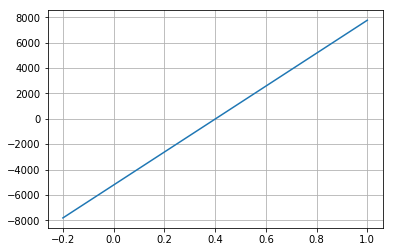

In [7]:
#Se grafica la función a partir de la función numérica
x = sm.symbols('x')

string = '12979.013 * x -5216.713'

#Se declara la función simbólica
f=sm.sympify(string)
fp = sm.diff(f,x)

#Se declara la función numérica
F = sm.lambdify(x, f)

#Se declara la función derivada
Fp= sm.lambdify(x, fp)

x = np.linspace(-0.2,1,101)
plt.plot(x,F(x))
plt.grid()
plt.show()

In [14]:
#se inicializan las variables para implementar el criterio de corte
x0= 0
x1=0.3 #Número arbitrario con tal de que no se cumpla el criterio de corte antes de entrar en el bucle.

i=1
while RelativeError(x0,x1) >= 0.5*10**(1-t):
    x1 = x0 - F(x0)/Fp(x0)
    x0=x1
    x1 = x0 - F(x0)/Fp(x0)
    raiz=x0
   
    print('Iteración',i, '=', "%.9f" % raiz)
    i=i+1

Iteración 1 = 0.401934492


In [17]:
raiz = (-b)/m
print (raiz)

0.12516643774735486


## $2.B\ Conclusiones$

_Por la función lineal que obtuvimos, podemos notar que unicamente se toma en consideración la raiz que se encuentra en el punto X = 0,4, en vez de la raiz en X $\tilde{=}$ 0,03. Esto consideramos que se debe al intervalo de puntos que tomamos de la función original para generar la tabla y, por ello, si deseamos encontrar la raiz que se encuentra en el intervalo (-0,3; 0,3) deberíamos haber tomado puntos en un intervalo más chico._
_A pesar de esto, consideramos que este método funciona de manera apropiada con los datos que recibe, puesto que tuvo exito encontrando una raiz de la función original._